# Instrument Classification in Carnatic Music (ICCM)
Group 4 - Guillem Gauchia - Àlex Herrero - Gerard San Miguel - Roddie Mc Guinness

# Feature Extraction

In this notebook we will extract various audio features for a sample of audio. We will focus on the time domain features of:

- Amplitude Envelope
- Root-Mean-Squared Energy
- Zero Crossing Rate

And the frequency domain features of:

- Band Energy Ratio
- Spectral Centroid
- Bandwidth
- Mel Frequency Cepstral Coefficients

Before beginning this notebook, you should have already create a dataset of audio samples from the Saraga Carnatic Dataset. If not, please review notebook **1. Dataset Creation**.

In [ ]:
!git clone -b DATASET https://github.com/Dunxter/iccm.git

Cloning into 'iccm'...
remote: Enumerating objects: 2252, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 2252 (delta 8), reused 8 (delta 4), pack-reused 2239
Receiving objects: 100% (2252/2252), 102.88 MiB | 25.37 MiB/s, done.
Resolving deltas: 100% (15/15), done.


Add the path to your .wav files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_home = 'drive/Shareddrives/TTM - GROUP 4/chunk wav files' #add your path here

Mounted at /content/drive


## 2.1 Load Samples

As part of **1. Dataset Creations** you should have created some loaders to load audio samples and associated metadata. Import these loaders and load one sample to experiment with.

In [ ]:
import os
import pandas as pd
import librosa
import numpy as np
import scipy
from zipfile import ZipFile


def load_sample(filepath):
    """
    Load sample with index, <index>
    """
    # Load the audio file using the index
    # audio_path = f'{index}.wav'
    audio, sr = librosa.load(filepath, sr=None)
    return audio, sr


def get_metadata(index):
    """
    Get metadata for sample with index, <index>
    """
    # Load the metadata CSV file
    metadata = pd.read_csv('metadata.csv')

    # Get the metadata for the specified index
    sample_metadata = metadata.loc[metadata['index'] == index].squeeze()
    return sample_metadata

In [ ]:
!ls

drive  iccm  sample_data


In [ ]:
directory = 'drive/MyDrive/p-4/Jupyter-lab Colab/+300.000 samples/samples.zip'
file_paths = []
with ZipFile(directory, 'r') as zip:
    sample = zip.extractall()

Are you able to listen to this audio and plot the waveform using `plot_waveform()` function from **1. Dataset Creation**?

In [ ]:
# Listen to audio
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
import IPython
import IPython.display as ipd


def plot_waveform(audio_array):
    """
    Plot waveform for <audio_array> using matplotlib.pyplot
    """
    plt.plot(audio_array)


def play_audio(audio_array):
    """
    Generate audio player for <audio_array> using Ipython library
    """
    sf.write('aux_audio.wav', audio_array, 44100)
    return ipd.Audio('aux_audio.wav')

In [ ]:
#get the array from the audio
audio_array, sr = librosa.load(sample, sr=44100)

In [ ]:
# Listen to audio
play_audio(audio_array)

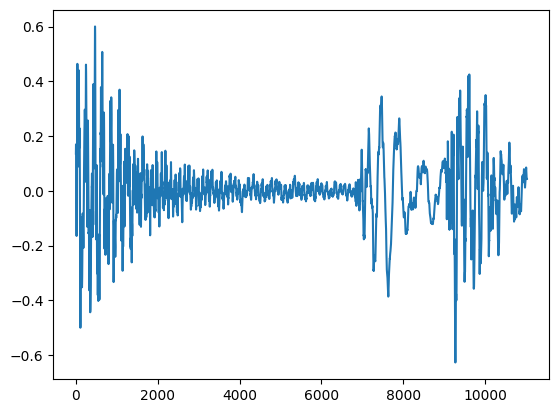

In [ ]:
# plot waveform
plot_waveform(audio_array)

## 2.1 Time Domain Features

Here we will extract the time domain features of:

- Amplitude Envelope
- Root-Mean-Squared Energy
- Zero Crossing Rate

We will work with the *time domain* representation of your audio (i.e. the amplitude values loaded by your loader).

### 2.1.1 Amplitude Envelope

The amplitude is computed by splitting the  audio into frames and taking the maximum amplitude value for each frame...

![title](images/amplitude_envelope.png)

Try and split your audio into frames of length `w`.

**Hint**: `numpy` indexing you to take windows of size `w` from an array using `np.array_split(array, w)`.

In [ ]:
# Split audio array
w = 44100 * 0.01
split_array = np.array_split(audio_array, w)

In [ ]:
audio_array
split_array

Take the maximum value for each window using `np.max()`.

**Hint** A list comprehension may be useful here: `[<f(x)> for x in <iterable>]` where `<iterable>` is some iterable object and `<f(x)>` is some functon to apply to each  element of that iterable.

In [ ]:
# Get amplitude envelope by taking the max of the values of the split array
def max_value(inputlist):
    return [np.max(sublist) for sublist in inputlist]

In [ ]:

max_values = max_value(split_array)
len(max_values)

441

Can you plot this envelope using `matplotlib.pyplot`. How does it compare with the original signal?

In [ ]:
def amplitude_envelope(input_array):
    w = 44100 * 0.01
    split_array = np.array_split(audio_array, w)
    return [np.max(sublist) for sublist in split_array]

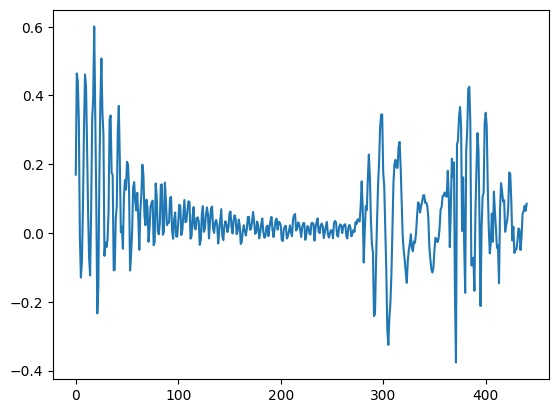

In [ ]:
plot_waveform(max_values)

### 2.1.2 Root Mean Square Energy

The RMS energy is computed using

![title](images/rms_energy.png)

The `librosa` libray has an implementation at `librosa.feature.rms`

In [ ]:
from librosa.feature import rms

In [ ]:
# extact rms value
root_ms = rms(y = audio_array)

In [ ]:
print(root_ms)
print(root_ms.shape)

[[0.15819265 0.16997229 0.17343615 0.12437271 0.07747407 0.04913189
  0.03801203 0.03201981 0.02716856 0.02402701 0.02098492 0.0197243
  0.03990816 0.11139578 0.13243145 0.13652378 0.13793352 0.15050794
  0.15763442 0.16016406 0.15602699 0.09891678]]
(1, 22)


### 2.1.3 Zero Crossing Rate

The zero crossing rate is the number of times the signal crosses the x axis

# ![title](images/zero_crossing_graph.png)


It is computed with the following equation

![title](images/zero_crossing_eq.png)

The `librosa` library provides an implementaton at `librosa.feature.zero_crossing_rate`

In [ ]:
# import librosa zero_crossing_rate
from librosa.feature import zero_crossing_rate

In [ ]:
# compute ZCR
zcr = zero_crossing_rate(audio_array)

In [ ]:
print(zcr)
print(zcr.shape)

[[0.01220703 0.02441406 0.03662109 0.04394531 0.04882812 0.04833984
  0.04833984 0.04296875 0.04150391 0.0390625  0.03515625 0.03417969
  0.03613281 0.02832031 0.02099609 0.01513672 0.01025391 0.01269531
  0.01513672 0.01953125 0.01513672 0.01123047]]
(1, 22)


## 2.2 Frequency Domain Features

Here we will extract the frequency domain features of:

- Band Energy Ratio
- Spectral Centroid
- Bandwidth
- Mel Frequency Cepstral Coefficients

We will work with the **frequency domain** representation of your audio (i.e. the frequency magnitude extracted from the fourier transform of your time domain signal).

Almost all implementations of these feature extractors will compute the frequency domain spectrum for you.

### 2.2.1 Band Energy Ratio

Band energy ratio is the ratio of energy between lower and higher frequency bands divided by some threshold, `F`.

![title](images/bre_spec.png)

![title](images/bre_eq.png)

The `essentia` library provides an implementation for computing the BER at `essentia.standard.EnergyBandRatio`. Import it and extract for your signal.

In [ ]:
!pip install essentia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 41.9 MB/s eta 0:00:00


In [ ]:
# import essentia
from essentia.standard import EnergyBandRatio
energy_band_ratio = EnergyBandRatio()

In [ ]:
# compute BER

ebr = energy_band_ratio(audio_array)

In [ ]:
print(ebr)

0.0018528969958424568


### 2.2.2 Spectral Centroid

The spectral centroid is a weighted mean of energy across all frequency bands. It is computed as:

![title](images/spec_cent.png)

The `librosa` libary provides an implementation at `librosa.feature.spectral_centroid`.

In [ ]:
# import librosa implementation
from librosa.feature import spectral_centroid

In [ ]:
# compute centroid for your signal
spec_cent = spectral_centroid(y = audio_array)

In [ ]:
print(spec_cent)
print(spec_cent.shape)

[[ 990.40932472 1008.98181323  977.86318576 1011.60201269 1054.27656531
  1073.11778376 1042.51233642 1008.28077564  940.8830242   944.57437888
   873.83800997  851.41183453 1015.81807259  929.68984936  562.67282254
   294.40635772  307.67369922 1126.64490963  950.70289241  677.72466891
   585.39730238  774.15779874]]
(1, 22)


### 2.2.3 Bandwidth

The bandwidth captures the variance around spectral centroid.

![title](images/bandwidth.png)

The `librosa` libary provides an implementation at `librosa.feature.spectral_bandwidth`.

In [ ]:
# import librosa implementation
from librosa.feature import spectral_bandwidth

In [ ]:
# compute bandwidth for your signal
spec_bw = spectral_bandwidth(y = audio_array)

In [ ]:
print(spec_bw)
print(spec_bw.shape)

[[1610.53380304 1414.87981461 1214.06755543 1194.14749762 1183.08501589
  1212.77131671 1226.60833875 1237.82785025 1230.67425074 1199.23284017
  1153.18419066 1112.63378393 1335.36318199 1386.3416335  1082.53387113
   679.38417834  749.80978328 1761.91558669 1570.91859127 1174.17034528
   976.93745677 1499.27818816]]
(1, 22)


### 2.2.4 Mel Frequency Cepstral Coefficients

MFCC maps frequency magnitudes to the more perceptually relevant Mel frequencies. The mapping between frequency and Mel frequency is as follows.

![title](images/mel_freq.png)

This mapping is not a simple conversion. More information on exactly how this is achieved can be found [here](https://www.youtube.com/watch?v=9GHCiiDLHQ4)

The `librosa` libary provides an implementation at `librosa.feature.mfcc`.

In [ ]:
# import librosa implementation
from librosa.feature import mfcc

In [ ]:
# compute MFCC coefficients for your signal
mfc_coeffs = mfcc(y = audio_array)

In [ ]:
mfc_coeffs.shape

(20, 22)

#Other Features we chose
- mean
- max
- min
- standard deviation
- spectral flatness

In [ ]:
from librosa.feature import spectral_flatness

In [ ]:
mean = np.mean(audio_array)
max = np.max(audio_array)
min = np.min(audio_array)
stdev = np.std(audio_array)
sf = spectral_flatness(y = audio_array)

## 2.3 Extracting features across the dataset

Now that you are able to extract features for one individual sample. Let's extract this to the entire dataset. The metadata file that you created in the **1. Dataset Creation** notebook should include all indices and filepaths of each sample.

**Hint**: The `pandas` library loads a csv to a pandas dataframe with `pandas.read_csv`

In [ ]:
# Load metadata
metadata_path = 'drive/MyDrive/p-4/Jupyter-lab Colab/+300.000 samples/metadata.csv'
metadata = pd.read_csv(metadata_path)

In [ ]:
!ls iccm

'Dataset Creation.ipynb'   metadata.csv   README.md


In [ ]:
metadata

,chunk_id,track_id,time_stamp,performance,contains_voice,contains_violin,contains_mridangam
0,0,0_Dorakuna,0.25,Dorakuna,False,False,False
1,1,0_Dorakuna,0.50,Dorakuna,False,False,False
2,2,0_Dorakuna,0.75,Dorakuna,False,False,False
3,3,0_Dorakuna,1.00,Dorakuna,False,False,False
4,4,0_Dorakuna,1.25,Dorakuna,False,False,False
...,...,...,...,...,...,...,...
307864,307864,143_Sundari_Nee_Divya,1508.75,Sundari Nee Divya,False,False,False
307865,307865,143_Sundari_Nee_Divya,1509.00,Sundari Nee Divya,False,True,False
307866,307866,143_Sundari_Nee_Divya,1509.25,Sundari Nee Divya,False,False,False
307867,307867,143_Sundari_Nee_Divya,1509.50,Sundari Nee Divya,False,True,False


Iterate through the rows in this metadata file, extracting filepath and index. For each filepath, load the audio sample and apply the feature extractors defined above. Make sure to store these features in a dataframe with columns=`index`,`feature_name`.

**Hint**: `.iterrows()` allows dataframe row iteration on pandas dataframe

**Hint**: `pandas.DataFrame` initialises a new dataframe

**Hint**: `df.append` appends new rows to a pandas dataframe

In [ ]:
cols = ['BER',
        'Amp_Env_Max',
        'Amp_Env_Min',
        'Amp_Env_Mean',
        'Amp_Env_Var',
        'RMSE_Max',
        'RMSE_Min',
        'RMSE_Mean',
        'ZCR_Max',
        'ZCR_Min',
        'ZCR_Mean',
        'Spec_Centroid_Max',
        'Spec_Centroid_Min',
        'Spec_Centroid_Mean',
        'Spec_Flatness_Max',
        'Spec_Flatness_Min',
        'Spec_Flatness_Mean',
        'Spec_Bandwidth_Max',
        'Spec_Bandwidth_Min',
        'Spec_Bandwidth_Mean',
        'Mean',
        'Max',
        'Min',
        'StDev'
        ]
for i in range(20):
    cols.append(f'MFCC_{i}')
features = pd.DataFrame(columns = cols)
features

,BER,Amp_Env_Max,Amp_Env_Min,Amp_Env_Mean,Amp_Env_Var,RMSE_Max,RMSE_Min,RMSE_Mean,ZCR_Max,ZCR_Min,...,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!ls

drive  iccm  sample_data  samples


In [ ]:
# iterate through
frame_length = 44100 * 0.5
      # FILEPATH NEEDS TO BE CHANGED
      #filepath = f'drive/Shareddrives/TTM - GROUP 4/chunk wav files/test/{index}.wav'
      #
for root, directories, files in os.walk('samples'):
    for filename in files:
          filepath = os.path.join(root, filename)
          audio_array, sr = load_sample(filepath)
          # extract features
          amp_env = amplitude_envelope(audio_array)
          root_mse = rms(y = audio_array)[0]
          zcr = zero_crossing_rate(y = audio_array)[0]
          spec_c = spectral_centroid(y = audio_array)[0]
          spec_f = spectral_flatness(y = audio_array)[0]
          spec_b = spectral_bandwidth(y = audio_array)[0]

          amp_env_max = np.max(amp_env)
          root_mse_max = np.max(root_mse)
          zcr_max = np.max(zcr)
          spec_c_max = np.max(spec_c)
          spec_f_max = np.max(spec_f)
          spec_b_max = np.max(spec_b)

          amp_env_min = np.min(amp_env)
          root_mse_min = np.min(root_mse)
          zcr_min = np.min(zcr)
          spec_c_min = np.min(spec_c)
          spec_f_min = np.min(spec_f)
          spec_b_min = np.min(spec_b)

          amp_env_mean = np.mean(amp_env)
          root_mse_mean = np.mean(root_mse)
          zcr_mean = np.mean(zcr)
          spec_c_mean = np.mean(spec_c)
          spec_f_mean = np.mean(spec_f)
          spec_b_mean = np.mean(spec_b)

          amp_env_var = np.var(amp_env)
          ber = energy_band_ratio(audio_array)
          mean = np.mean(audio_array)
          max = np.max(audio_array)
          min = np.min(audio_array)
          std = np.std(audio_array)
          mfc_coeffs = mfcc(y = audio_array)[0]

          # store in new features dataframe
          row = ({'Amp_Env_Max': amp_env_max,
                          'Amp_Env_Min': amp_env_min,
                          'Amp_Env_Mean': amp_env_mean,
                          'Amp_Env_Var': amp_env_var,
                          'RMSE_Max': root_mse_max,
                          'RMSE_Min': root_mse_min,
                          'RMSE_Mean': root_mse_mean,
                          'ZCR_Max': zcr_max,
                          'ZCR_Min': zcr_min,
                          'ZCR_Mean': zcr_mean,
                          'BER': ber,
                          'Spec_Centroid_Max': spec_c_max,
                          'Spec_Centroid_Min': spec_c_min,
                          'Spec_Centroid_Mean': spec_c_mean,
                          'Spec_Flatness_Max': spec_f_max,
                          'Spec_Flatness_Min': spec_f_min,
                          'Spec_Flatness_Mean': spec_f_mean,
                          'Spec_Bandwidth_Max': spec_b_max,
                          'Spec_Bandwidth_Min': spec_b_min,
                          'Spec_Bandwidth_Mean': spec_b_mean,
                          'Mean': mean,
                          'Max': max,
                          'Min': min,
                          'StDev': std
                          })
          for i in range(20):
              row[f'MFCC_{i}'] = mfc_coeffs[i]
          features = features.append(row, ignore_index = True)
print(features.head())

        BER  Amp_Env_Max  Amp_Env_Min  Amp_Env_Mean  Amp_Env_Var  RMSE_Max  \
0  0.006061     0.281342    -0.090302      0.088227     0.007371  0.094870   
1  0.004512     0.280975    -0.132568      0.082936     0.005619  0.128871   
2  0.006468     0.139526    -0.053772      0.023949     0.001886  0.049900   
3  0.004367     0.641907    -0.415527      0.026033     0.016076  0.267904   
4  0.005356     0.414856    -0.205414      0.079291     0.010331  0.185070   

   RMSE_Min  RMSE_Mean   ZCR_Max   ZCR_Min  ...     MFCC_10     MFCC_11  \
0  0.051239   0.079648  0.075195  0.016113  ... -266.750366 -262.741943   
1  0.059394   0.091771  0.058594  0.024902  ... -212.688263 -231.262589   
2  0.031766   0.040711  0.053711  0.005371  ... -308.021362 -311.401917   
3  0.015638   0.084500  0.037109  0.003906  ... -385.590698 -387.289673   
4  0.070489   0.115049  0.028320  0.010742  ... -286.069580 -274.246246   

      MFCC_12     MFCC_13     MFCC_14     MFCC_15     MFCC_16     MFCC_17  \
0 -

Store this features dataframe alongside the original dataset

**Hint**: `df.to_csv` writes a dataframe to csv file

In [ ]:
# write dataframe
features.to_csv('/content/drive/MyDrive/p-4/Jupyter-lab Colab/Feature Extraction/features.csv')

Amplitude Envelope
Root-Mean-Squared Energy
Zero Crossing Rate
And the frequency domain features of:

Band Energy Ratio
Spectral Centroid
Bandwidth
Mel Frequency Cepstral Coefficients